In [88]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import scipy.stats as ss
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
warnings.filterwarnings('ignore')

In [3]:
ins=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

# Exploratory Data Analysis

In [4]:
ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
# Getting Information about the data
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that most of the columns are of object type and the feature '_c39' has no data in it.

In [6]:
ins.drop('_c39',axis=1,inplace=True) #dropping the empty column

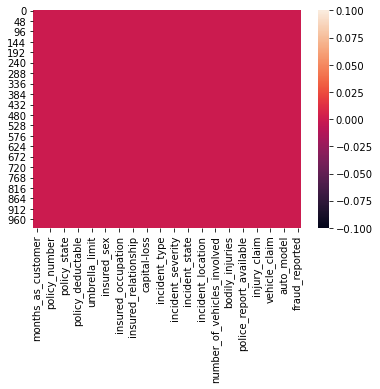

In [7]:
sns.heatmap(ins.isnull())
plt.show()

In [8]:
ins.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,28-04-1992,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,Dodge,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


In [9]:
ins[ins['police_report_available']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,2,?,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,183430,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,...,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,04-07-2007,IN,250/500,1000,1248.05,0,443550,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N


In [10]:
ins[ins['property_damage']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,558938,08-06-2005,OH,500/1000,1000,1199.44,5000000,619884,...,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [11]:
# There are '?' marks present in the 'police_report_available' and 'property_damage'.
ins['police_report_available']=ins['police_report_available'].replace('?',ss.mode(ins['police_report_available'])[0][0])
ins['property_damage']=ins['property_damage'].replace('?',ss.mode(ins['property_damage'])[0][0])
ins['collision_type']=ins['collision_type'].replace('?',ss.mode(ins['collision_type'])[0][0])

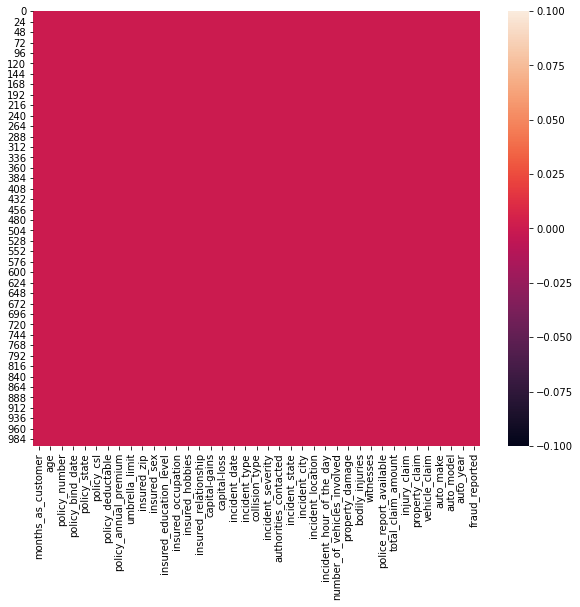

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(ins.isnull())
plt.show()

# Data Visualisation

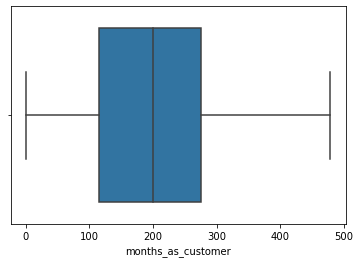

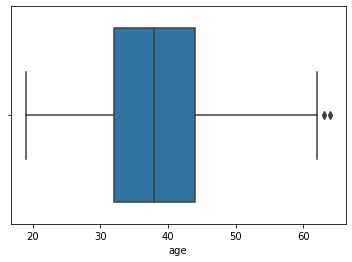

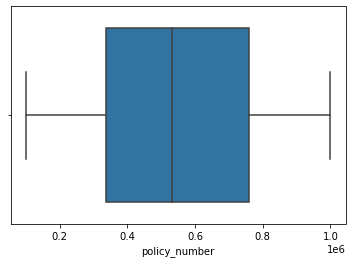

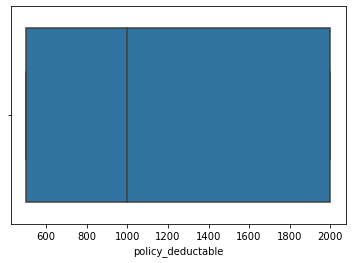

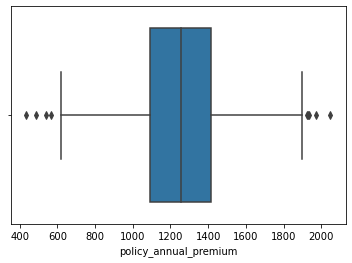

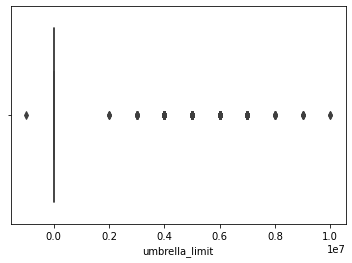

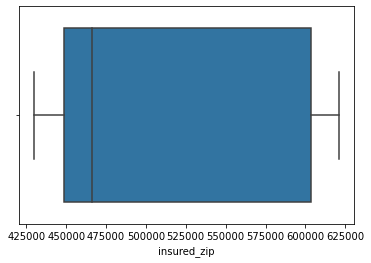

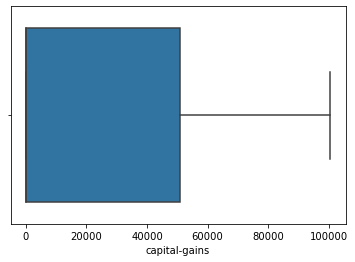

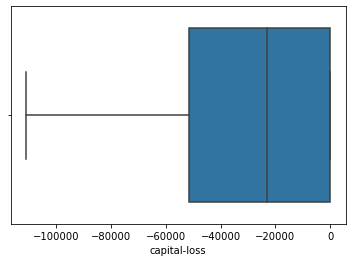

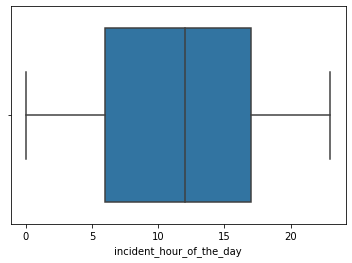

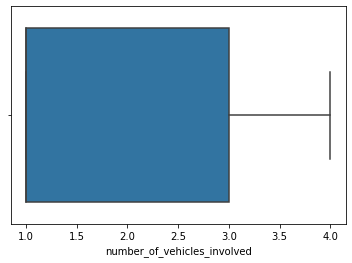

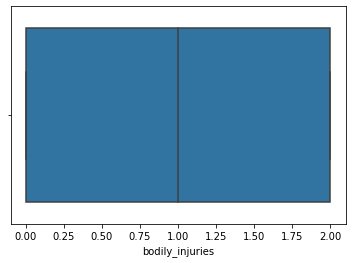

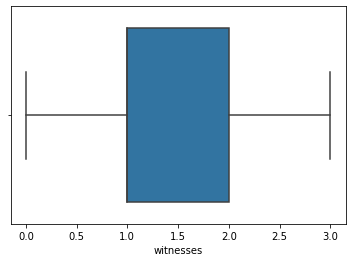

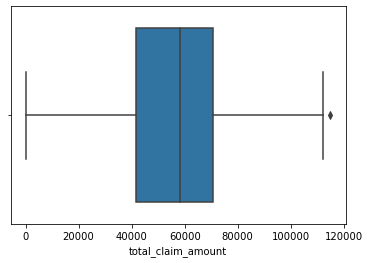

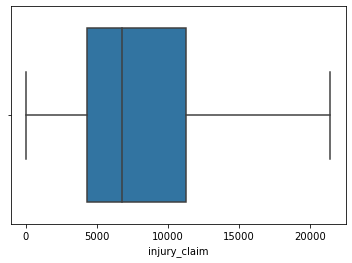

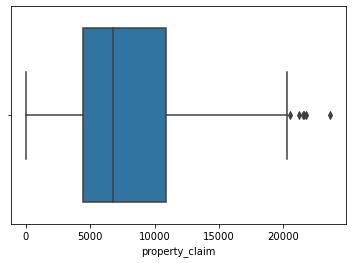

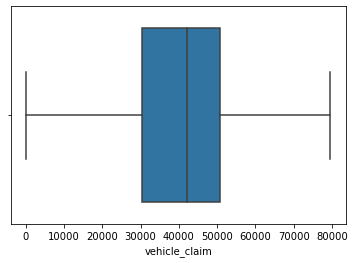

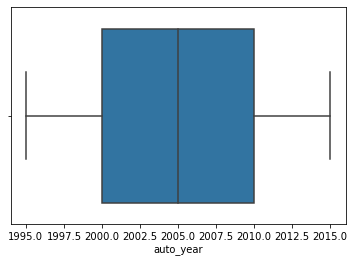

In [13]:
for i in ins.columns:
    if ins[i].dtype=='int64' or ins[i].dtype==float:
        sns.boxplot(ins[i])
        plt.show()

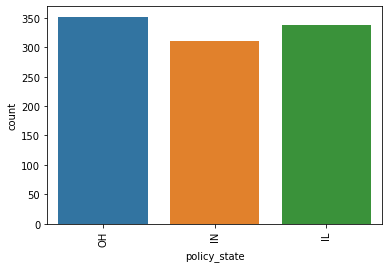

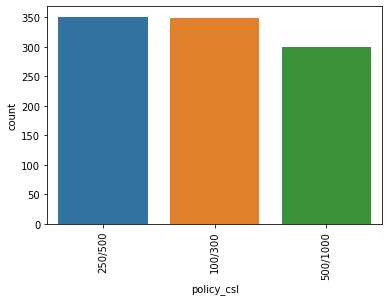

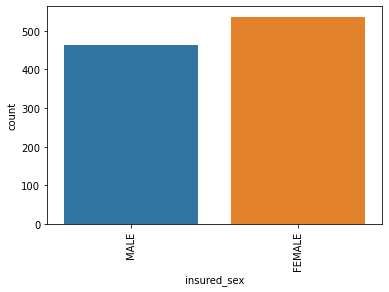

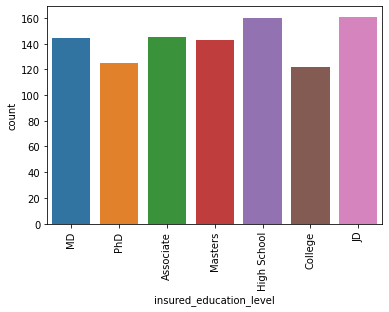

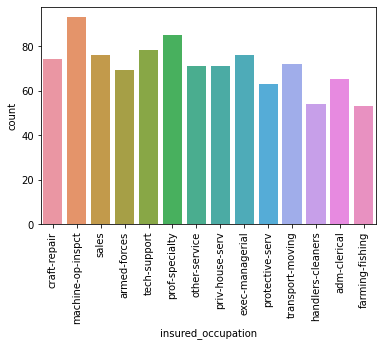

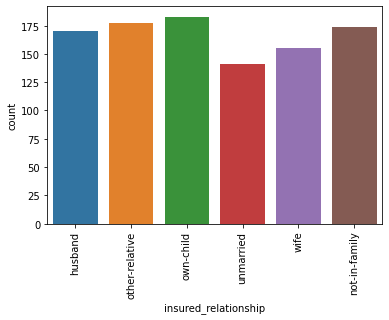

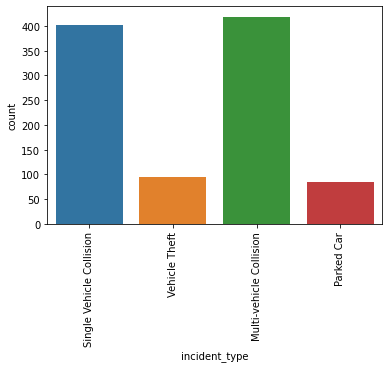

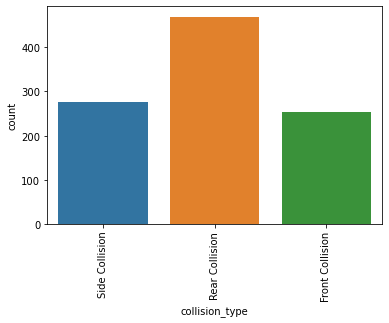

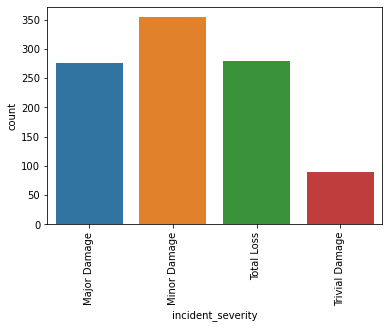

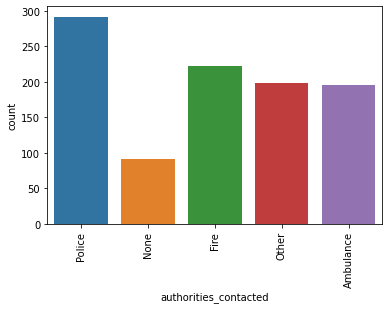

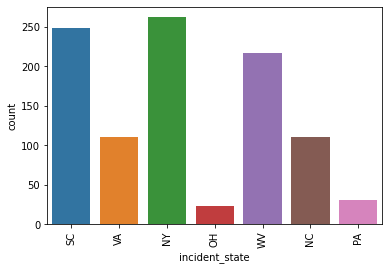

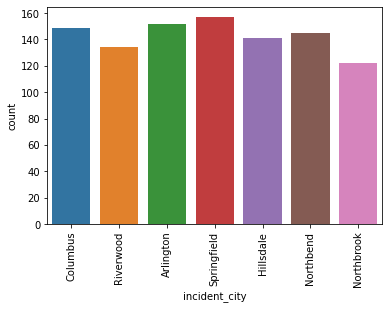

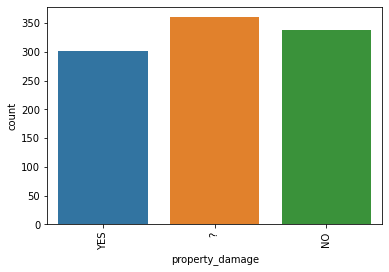

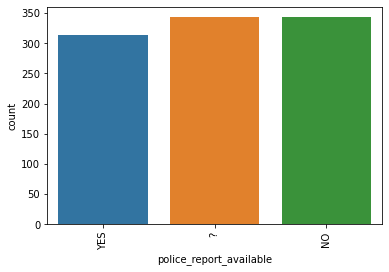

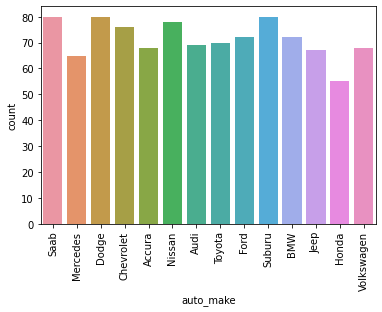

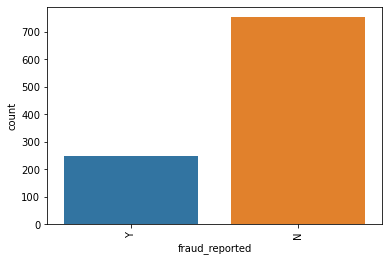

In [14]:
for i in ins.columns:
    if ins[i].dtype=='O' and ins[i].nunique()<20:
        sns.countplot(ins[i])
        plt.xticks(rotation=90)
        plt.show()

In [15]:
ins['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [16]:
print('class ratio: ',247*100/753,'%')

class ratio:  32.80212483399735 %


**Encoding the categorical variables**

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ins.columns:
    if ins[i].dtype==object:
        ins[i]=le.fit_transform((ins[i].astype(str)))

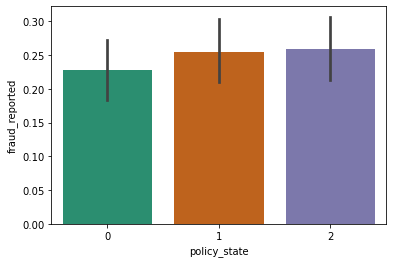

2    352
0    338
1    310
Name: policy_state, dtype: int64

In [18]:
sns.barplot(ins['policy_state'], ins['fraud_reported'],palette='Dark2')
plt.show()
ins['policy_state'].value_counts()
# 0-OH
#1-IN
#2-IL

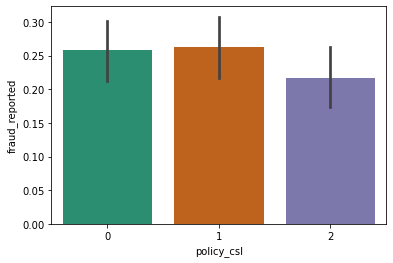

2    352
0    338
1    310
Name: policy_state, dtype: int64

In [19]:
sns.barplot(ins['policy_csl'], ins['fraud_reported'],palette='Dark2')
plt.show()
ins['policy_state'].value_counts()
# 0-250/500
#1-100/300
#2-500/1000

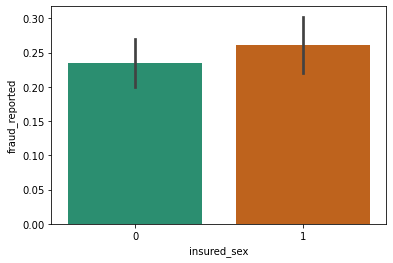

0    537
1    463
Name: insured_sex, dtype: int64

In [20]:
sns.barplot(ins['insured_sex'], ins['fraud_reported'],palette='Dark2')
plt.show()
ins['insured_sex'].value_counts()
# 0-Male
#1-Female

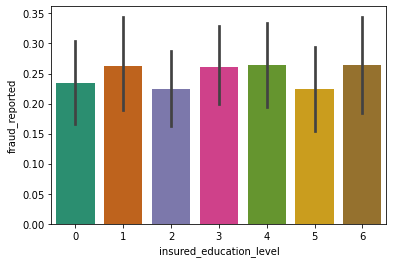

3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64

In [21]:
sns.barplot(ins['insured_education_level'], ins['fraud_reported'],palette='Dark2')
plt.show()
ins['insured_education_level'].value_counts()
# 0-MD
#1-pHD
#2-Asssociate
#3-masters
#4-high school
#5-college
#6-JD

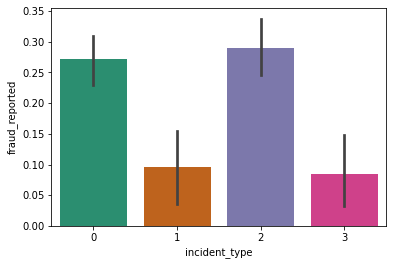

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64

In [22]:
sns.barplot(ins['incident_type'], ins['fraud_reported'],palette='Dark2')
plt.show()
ins['incident_type'].value_counts()
# 0-Single vehicle collision
#1-vehicle theft
#2-multi vehicle collision
#3-car parking

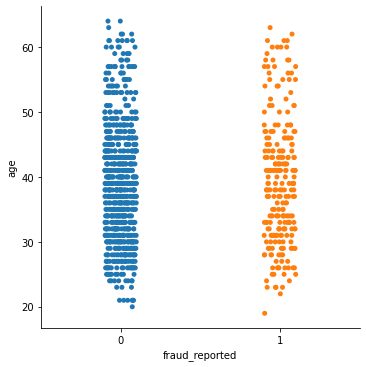

In [23]:
sns.catplot(x='fraud_reported',y='age',data=ins)
plt.show()

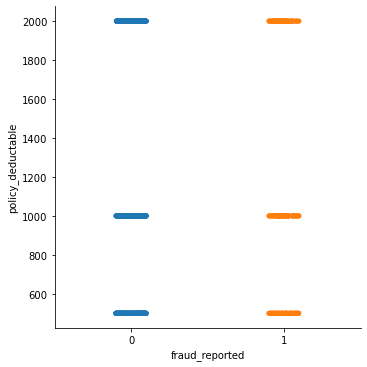

In [24]:
sns.catplot(x='fraud_reported',y='policy_deductable',data=ins)
plt.show()

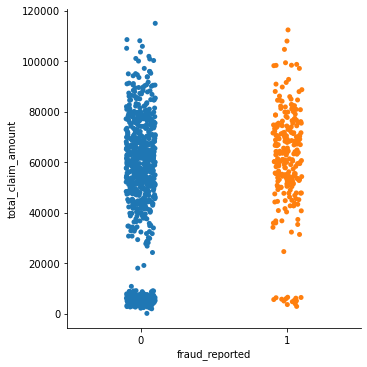

In [25]:
sns.catplot(x='fraud_reported',y='total_claim_amount',data=ins)
plt.show()

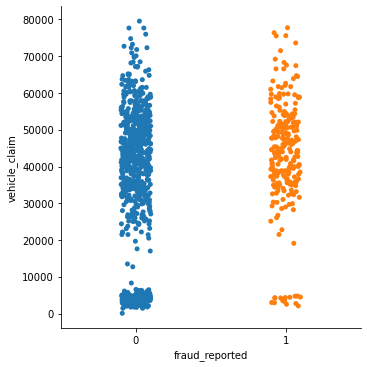

In [26]:
sns.catplot(x='fraud_reported',y='vehicle_claim',data=ins)
plt.show()

# Handling Outliers

In [27]:
from scipy.stats  import zscore
threshold=3
z=np.absolute(zscore(ins))
ins=ins[(z<3).all(axis=1)]

In [36]:
ins.shape

(980, 37)

**Correlation**

In [28]:
ins.corr()['fraud_reported'].sort_values()

incident_severity             -0.401808
incident_date                 -0.061271
incident_state                -0.052027
insured_hobbies               -0.048181
authorities_contacted         -0.043636
incident_type                 -0.040893
incident_city                 -0.039434
policy_number                 -0.036887
policy_csl                    -0.032509
auto_make                     -0.032206
property_damage               -0.028548
police_report_available       -0.023824
capital-loss                  -0.017617
collision_type                -0.016776
capital-gains                 -0.014993
policy_annual_premium         -0.012686
incident_location             -0.007499
auto_model                    -0.002825
insured_occupation             0.000277
auto_year                      0.001152
incident_hour_of_the_day       0.004326
insured_zip                    0.009699
insured_education_level        0.013116
age                            0.013279
policy_deductable              0.015774


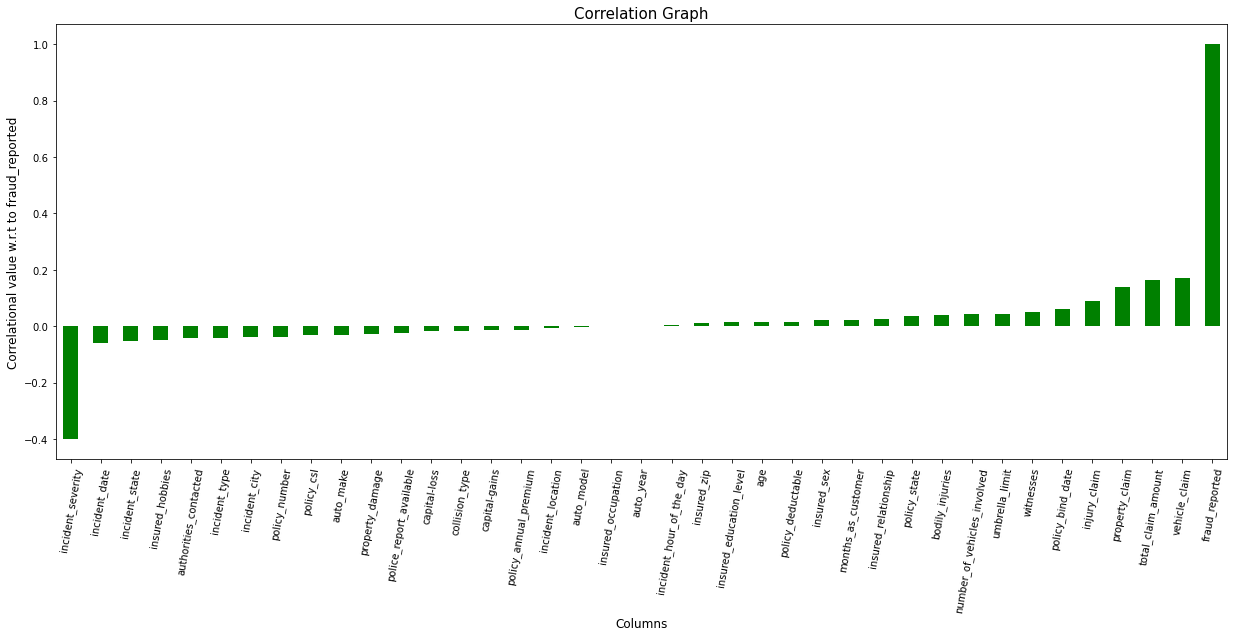

In [29]:
plt.figure(figsize=(21,8))
ins.corr()['fraud_reported'].sort_values().plot(kind='bar',color='green')
plt.title('Correlation Graph',size=15)
plt.ylabel('Correlational value w.r.t to fraud_reported',size=12)
plt.xlabel('Columns',size=12)
plt.xticks(rotation=80)
plt.show()

In [30]:
ins.drop(['umbrella_limit','policy_bind_date'],axis=1,inplace=True)

# Splitting the data into features and vectors

In [71]:
x=ins.drop('fraud_reported',axis=1)
y=ins['fraud_reported']

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=17)

In [73]:
# Handling class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=34)
oversampled_xtrain, oversampled_ytrain = sm.fit_resample(xtrain,ytrain)

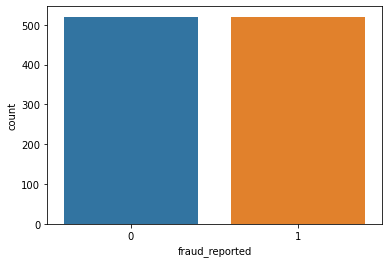

(1040,) (1040, 36)


In [74]:
sns.countplot(oversampled_ytrain)
plt.show()
print(oversampled_ytrain.shape,oversampled_xtrain.shape)

# Building Model

**LogisticRegression**

In [75]:
log=LogisticRegression() 
log.fit(oversampled_xtrain,oversampled_ytrain)
pred_log=log.predict(xtest)
acc_log = accuracy_score(ytest , pred_log)*100
print('Accuracy Score: ',acc_log,'%\n\n')
print(confusion_matrix(ytest , pred_log),'\n\n')
print(classification_report(ytest , pred_log))

Accuracy Score:  52.04081632653062 %


[[108 112]
 [ 29  45]] 


              precision    recall  f1-score   support

           0       0.79      0.49      0.61       220
           1       0.29      0.61      0.39        74

    accuracy                           0.52       294
   macro avg       0.54      0.55      0.50       294
weighted avg       0.66      0.52      0.55       294



**RandomForestClassifier**

In [76]:
random_forest = RandomForestClassifier()
random_forest.fit(oversampled_xtrain, oversampled_ytrain)
pred_r = random_forest.predict(xtest)
acc_r = accuracy_score(ytest , pred_r)*100
print('Accuracy Score: ',acc_r,'%\n\n')
print(confusion_matrix(ytest , pred_r),'\n\n')
print(classification_report(ytest , pred_r))

Accuracy Score:  80.61224489795919 %


[[198  22]
 [ 35  39]] 


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       220
           1       0.64      0.53      0.58        74

    accuracy                           0.81       294
   macro avg       0.74      0.71      0.73       294
weighted avg       0.80      0.81      0.80       294



**DecisionTreeClassifier**

In [77]:
dt = DecisionTreeClassifier()
dt.fit(oversampled_xtrain,oversampled_ytrain)
pred2=dt.predict(xtest)
print(accuracy_score(pred2,ytest)*100,'%','\n\n')
print(classification_report(pred2,ytest),'\n\n')
print(confusion_matrix(pred2,ytest))

74.82993197278913 % 


              precision    recall  f1-score   support

           0       0.80      0.85      0.83       206
           1       0.59      0.50      0.54        88

    accuracy                           0.75       294
   macro avg       0.70      0.68      0.68       294
weighted avg       0.74      0.75      0.74       294
 


[[176  30]
 [ 44  44]]


**SVC**

In [78]:
svc = SVC()
svc.fit(oversampled_xtrain, oversampled_ytrain)
pred_svc = svc.predict(xtest)
acc_svc = accuracy_score(ytest , pred_svc)*100
print('Accuracy Score: ',acc_svc,'%\n\n')
print(confusion_matrix(ytest , pred_svc),'\n\n')
print(classification_report(ytest , pred_svc))

Accuracy Score:  43.53741496598639 %


[[ 72 148]
 [ 18  56]] 


              precision    recall  f1-score   support

           0       0.80      0.33      0.46       220
           1       0.27      0.76      0.40        74

    accuracy                           0.44       294
   macro avg       0.54      0.54      0.43       294
weighted avg       0.67      0.44      0.45       294



**KNeighborsClassifier**

In [80]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(oversampled_xtrain, oversampled_ytrain)
pred_knn = knn.predict(xtest)
acc_knn = accuracy_score(ytest , pred_knn)*100
print('Accuracy Score: ',acc_knn,'%\n\n')
print(confusion_matrix(ytest , pred_knn),'\n\n')
print(classification_report(ytest , pred_knn))

Accuracy Score:  47.61904761904761 %


[[105 115]
 [ 39  35]] 


              precision    recall  f1-score   support

           0       0.73      0.48      0.58       220
           1       0.23      0.47      0.31        74

    accuracy                           0.48       294
   macro avg       0.48      0.48      0.44       294
weighted avg       0.60      0.48      0.51       294



# Cross Validation Score

In [85]:
ls = cross_val_score(dt, x, y, cv=5)
print('cross_val_score of DecisiontreeClassifier:',ls.mean()*100)

cross_val_score of DecisiontreeClassifier: 77.3469387755102


In [86]:
ls = cross_val_score(random_forest, x, y, cv=5)
print('cross_val_score of random_forest:',ls.mean()*100)

cross_val_score of random_forest: 77.85714285714288


# Hyper Parameter tuning

In [91]:
parameters= {'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [92]:
gv = GridSearchCV(random_forest,parameters,cv=5,scoring='accuracy')
gv.fit(oversampled_xtrain,oversampled_ytrain)
gv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

In [97]:
gv_predict = gv.best_estimator_.predict(xtest)
print("Final accuracy of the model: ",accuracy_score(ytest,gv_predict)*100,"%")

Final accuracy of the model:  81.97278911564626 %


# ROC AUC Curv:

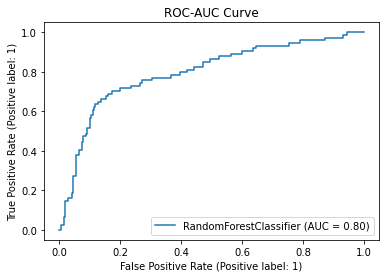

In [98]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gv.best_estimator_, xtest, ytest)
plt.title('ROC-AUC Curve')
plt.show()

# Saving The Best  Model

In [99]:
import pickle
filename='Churn_prediction.pkl'
pickle.dump(log,open(filename,'wb'))